<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/KMeans%2B%2B(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import KernelPCA
from tensorflow.keras.datasets import mnist

In [ ]:
# mnist 데이터를 불러온다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5000, 784), (5000,), (1000, 784), (1000,))

In [ ]:
# Z-score nomalization.
# 그냥하면 세로 방향으로 표준화한다. 가로 방향으로 표준화하기 위해 transpose 후 # 표준화하고, 결과를 다시 transpose 했다.
sc = StandardScaler()
inputX = sc.fit_transform(x_train.T).T
inputX.shape

(5000, 784)

In [ ]:
# Kernel PCA로 차원을 줄인다
# Kernel PCA를 이용해서 28 * 28 = 784 -> 50 차원으로 축소
pca = KernelPCA(n_components = 50, kernel='rbf')
inputX = pca.fit_transform(inputX)

In [ ]:
# K-means++ 알고리즘으로 학습 데이터를 K 그룹으로 분류한다.
km = KMeans(n_clusters=10, init='k-means++', n_init=3, max_iter=300,
            tol=1e-04, random_state=0)
km = km.fit(inputX)
clust = km.predict(inputX) 

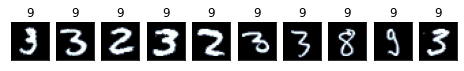

<Figure size 576x144 with 0 Axes>

In [ ]:
# cluster 별로 이미지를 확인한다. 
f = plt.figure(figsize=(8, 2)) 
for k in np.unique(clust):
  # cluster가 i인 imageX image 10개를 찾는다. 
  idx = np.where(clust == k)[0][:10]
  
fig = plt.figure(figsize=(8, 2))
for i in range(10):
  image = x_train[idx[i]].reshape(28,28)
  ax = f.add_subplot(1, 10, i + 1)
  ax.imshow(image, cmap=plt.cm.bone)
  ax.grid(False)
  ax.set_title(k)
  ax.xaxis.set_ticks([])
  ax.yaxis.set_ticks([])
plt.tight_layout()